In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Section A: Equiprobability

### Question 1
Check that equiprobability is satisfied in **direct_disks_box.py**. Check it not for all legal configurations, but for the three configurations (a, b, c) shown below. The probability to hit any of these configurations exactly is of course zero, so we must put little boxes around them, as shown in red:

<img src="Section 1.png"/>

Using small boxes $[x - \delta_{xy}, x + \delta_{xy}]$, etc, modify the program **direct_disks_box_multirun.py** to show that the probability to sample configurations a, b, and c are the same (within the numerical precision), with

In [2]:
a = ((0.30, 0.30), (0.30, 0.70), (0.70, 0.30), (0.70,0.70))
b = ((0.20, 0.20), (0.20, 0.80), (0.75, 0.25), (0.75,0.75))
c = ((0.30, 0.20), (0.30, 0.80), (0.70, 0.20), (0.70,0.70))

### Solution

In [41]:
def draw_circle(coord, radius):
    fig, ax = plt.subplots()
    for x in coord:
        c = plt.Circle(x, radius) 
        ax.add_artist(c)
    
    plt.show()

In [96]:
def sample_disks(balls, radius):
    coords = np.random.uniform(low = radius, high = 1-radius, size=(balls, 2))
    
    for i in range(coords.shape[0]):
        for j in range(i, coords.shape[0]):
            if np.sum((coords[0] - coords[1])**2) < 2*radius:
                return sample_disks(balls, radius)
    return coords

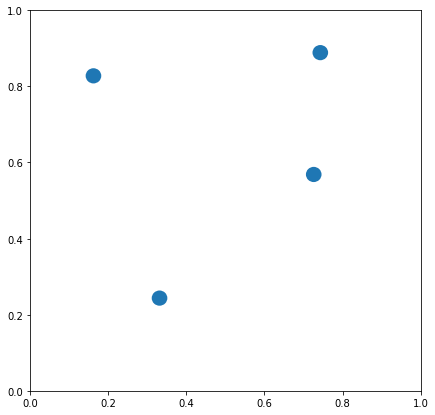

In [101]:
plt.rcParams['figure.figsize'] = [7, 7]

draw_circle(sample_disks(4, 0.02), 0.02)

In [123]:
conf_a = np.array(a)
conf_b = np.array(b)
conf_c = np.array(c)

hits = {"conf_A":0, "conf_B":0, "conf_C":0}

eta = 0.05
balls = 4
radius = 0.15
runs = int(1e6)

In [131]:
# Sampling of to compare results.

for x in range(1, runs+1):
    sample_points = sample_disks(balls, radius)

    hits["conf_A"] += (np.max(np.abs(sample_points - conf_a)) < eta)
    hits["conf_B"] += (np.max(np.abs(sample_points - conf_b)) < eta)
    hits["conf_C"] += (np.max(np.abs(sample_points - conf_c)) < eta)
    
    if x in [int(1e1), int(1e2), int(1e3), int(1e4), int(1e5), int(1e6)]:
        print("For {} samples: {}".format(x, hits))

For 10 samples: {'conf_A': 0, 'conf_B': 1, 'conf_C': 0}
For 100 samples: {'conf_A': 0, 'conf_B': 1, 'conf_C': 0}
For 1000 samples: {'conf_A': 0, 'conf_B': 1, 'conf_C': 0}
For 10000 samples: {'conf_A': 0, 'conf_B': 1, 'conf_C': 0}
For 100000 samples: {'conf_A': 0, 'conf_B': 1, 'conf_C': 0}
For 1000000 samples: {'conf_A': 0, 'conf_B': 3, 'conf_C': 1}


In [138]:
conf_a = np.array(a)
conf_b = np.array(b)
conf_c = np.array(c)

hits = {"conf_A":0, "conf_B":0, "conf_C":0}

eta = 0.10
balls = 4
radius = 0.15
runs = int(1e6)

In [139]:
for x in range(1, runs+1):
    sample_points = sample_disks(balls, radius)

    hits["conf_A"] += (np.max(np.abs(sample_points - conf_a)) < eta)
    hits["conf_B"] += (np.max(np.abs(sample_points - conf_b)) < eta)
    hits["conf_C"] += (np.max(np.abs(sample_points - conf_c)) < eta)
    
    if x in [int(1e1), int(1e2), int(1e3), int(1e4), int(1e5), int(1e6)]:
        print("For {} samples: {}".format(x, hits))

For 10 samples: {'conf_A': 0, 'conf_B': 0, 'conf_C': 0}
For 100 samples: {'conf_A': 0, 'conf_B': 0, 'conf_C': 0}
For 1000 samples: {'conf_A': 0, 'conf_B': 0, 'conf_C': 0}
For 10000 samples: {'conf_A': 0, 'conf_B': 1, 'conf_C': 1}
For 100000 samples: {'conf_A': 2, 'conf_B': 3, 'conf_C': 8}
For 1000000 samples: {'conf_A': 13, 'conf_B': 41, 'conf_C': 61}


Here all the points are configuration ie. each 8-dimensional points are sampled independently. But due to that sometime, such configurations are sampled which violates the overlapping constraints, but those configurations are rejected and the point is resampled until it doesn't violate the constraints.
If the sampling was done as a chain, only the sampling os seed would be independent and the rest of the points will be conditioned on that first point and the probability of the sample will not be equiprobable each participant of the set of all possible configuration.

# Question 2

Analogously, check equiprobability of the configurations a, b, and c of Section A1, for the algorithm markov_disks_box.py

Compare with the analogous problem in Section A1: You might observe larger fluctuations of the results. Is that at all possible, given that Markov-chain sampling and Direct sampling should yield the same results?